In [176]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,SVC

In [184]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
#y = iris["target"] #if you want it to classify all 3
y = (iris["target"] == 2).astype(np.int) #if you want to classify only one
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))  #SVC(kernel="linear", C=1)
    #dual hyperparameter to True, if there are more features than training instances
))

In [185]:
svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [186]:
svm_clf.predict([[5.5, 1.7]])

array([1])

In [187]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [189]:
polynomial_svm_clf = Pipeline((
    ("poly_feature",PolynomialFeatures()),
    ("scalar",StandardScaler()),
    ("linear_svc",LinearSVC(C=1, loss="hinge"))
))

In [191]:
polynomial_svm_clf.fit(X,y)

Pipeline(steps=(('poly_feature', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [195]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

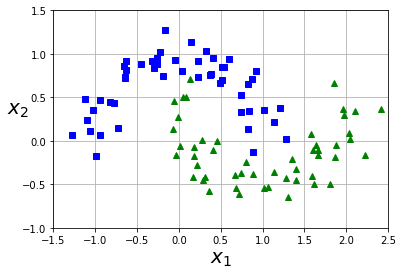

In [198]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

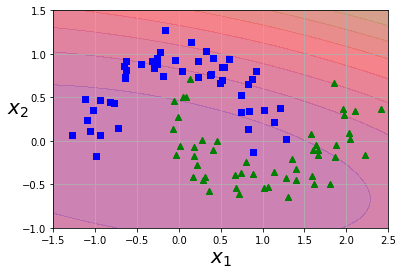

In [200]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

SyntaxError: invalid syntax (<ipython-input-202-34160d38a2a7>, line 1)

In [188]:
import inspect
test = LinearSVC
print(inspect.getfullargspec(test))
print(inspect.signature(test))

FullArgSpec(args=['self', 'penalty', 'loss', 'dual', 'tol', 'C', 'multi_class', 'fit_intercept', 'intercept_scaling', 'class_weight', 'verbose', 'random_state', 'max_iter'], varargs=None, varkw=None, defaults=('l2', 'squared_hinge', True, 0.0001, 1.0, 'ovr', True, 1, None, 0, None, 1000), kwonlyargs=[], kwonlydefaults=None, annotations={})
(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)


TypeError: __init__() missing 1 required positional argument: 'steps'